# CS231a PSET 3 Problem 3: Representation Learning with Self-Supervised Learning


# Problem Layout

In this notebook, we will be using the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) to show case how self-supervised representation learning can be utilized for more efficient training in downstream tasks. We will do the following things:

1. Train a classifier from scratch on the MNIST dataset and observe how fast and well it learns.

2. Train useful representations via predicting digit rotations, rather than classifying digits.

3. Transfer our rotation pretraining features to solve the classification task with much less data than in step 1.

First, you should upload the 'problem3' directory onto a location of your choosing in Drive and run the following to have access to the code within it:


In [1]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the unzipped
# 'problem 3' folder containing the '.py' files needed for this problem
# e.g. '/content/drive/MyDrive/cs231a/representation_learning':
FOLDERNAME = '/content/drive/MyDrive/cs231a/ps3_code/p3'

assert FOLDERNAME is not None, "[!] Enter the foldername."

#%cd drive/My\ Drive
%cd $FOLDERNAME

Mounted at /content/drive
/content/drive/MyDrive/cs231a/ps3_code/p3


In [2]:
import problem3

Import works!


If the above import of problem3 works, you are ready to get going with the rest of this problem! Before that, let's make sure you allocate a GPU so that code runs faster: click Runtime -> Change runtime type -> Hardware Accelerator -> GPU and your Colab instance will automatically be backed by GPU compute.

# PyTorch MNIST Data Preparation

First, let's get the data prepared. Luckily, PyTorch has a handy function to download it for us in its [torchvision.datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#cifar) package:

In [3]:
# Download MNIST dataset from PyTorch 
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,)),
                              ])
PATH_TO_STORE_DATA = 'data/'
torchvision.datasets.MNIST(PATH_TO_STORE_DATA, download=True, train=True, 
                                             transform=transform)
torchvision.datasets.MNIST(PATH_TO_STORE_DATA, download=True, train=False, 
                                            transform=transform)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

Now that we have downloaded the data, we will implement a PyTorch [Dataset](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html) so that we can load subsets of the full MNIST dataset and use either digit identity or digit rotation as the label for a given image. Fill in the requisite bits of code in data.py (marked with TODO), (you can either do so directly through the file explorer on the left or do so locally and re-upload it), and try to execute the following:

In [4]:
from importlib import reload  
import problem3.data 


Now, let's create an instance of this Dataset for training MNIST digit classification. We will create two versions of the training dataset, one with all the data and one with a small subset. If you have bugs in your code, simply modify data.py further (you can either do so directly through the file explorer on the left or do so locally and re-upload it).

In [5]:
problem3.data = reload(problem3.data) #reload for making changes during debugging
train_full_dataset = problem3.data.MNISTDataset(FOLDERNAME + '/data/MNIST/processed/training.pt', 
                                          pct=1.0, classify_digit_type=True)

test_full_dataset = problem3.data.MNISTDataset('data/MNIST/processed/test.pt', 
                                         pct=1.0, classify_digit_type=True)
print('Full dataset: {0} Training Samples | {1} Test Samples'.format(
    len(train_full_dataset), len(test_full_dataset)))
train_small_dataset = problem3.data.MNISTDataset('data/MNIST/processed/training.pt', 
                                          pct=0.01, classify_digit_type=True)
print('Small train dataset: {0} Training Samples'.format(len(train_small_dataset)))


Full dataset: 60000 Training Samples | 10000 Test Samples
Small train dataset: 600 Training Samples


Let's use the handy show_batch function to get an idea of what's in the dataset:

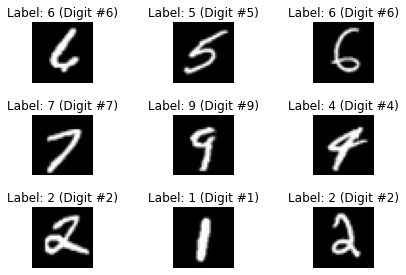

In [6]:
train_full_dataset.show_batch()

# PyTorch Vision Model

Next, we need to define our neural net architectures for training on the data. Because we want to ultimately train for two objects (digit classification and rotation classification), we will do this via several classes so that the weights gotten from representation learning can be re-used later for more efficient digit classification.
Fill in the marked portions of models.py, and try to execute the following:

In [29]:
import problem3.models
problem3.models = reload(problem3.models) #reload for making changes during debugging

image_embed_net = problem3.models.ImageEmbedNet().cuda()
classify_net = problem3.models.ClassifyNet(10).cuda()
mnist_classify_model = problem3.models.ImageClassifyModel(image_embed_net, 
                                                          classify_net)

If running the above results in errors, revise your code in models.py the file as in the last section.

# Training for MNIST Digit Prediction

Let's now implement a method for training on the dataset with the models we defined above. We will create a re-usable function that can be used for both representation learning and learning to classify MNIST digits. This will involve the following:
*   Given the dataset, creating a PyTorch [DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) which can take care of shuffling the dataset as well as combining multiple image.
*   Creating a PyTorch loss function that can be used for optimizing our model for the task of classification. We will use the standard [Cross Entropy Loss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).
*   Creating a PyTorch [optimizer](https://pytorch.org/docs/stable/optim.html) to update the weights of the model given the loss computation.
*   Lastly, our two training loops (one for the number of epochs, and one for iterating over the dataset) in which we use all the above to train the model.

Fill in the relevant portions of code in training.py, and try to execute the following to go ahead and train on the MNIST digit classification task. If training.py is finished, we now just need to call its train function:

Epoch 0 - Training loss: 0.144 , Training Accuracy: 9.872
Epoch 1 - Training loss: 0.040 , Training Accuracy: 78.938
Epoch 2 - Training loss: 0.007 , Training Accuracy: 96.628
Epoch 3 - Training loss: 0.005 , Training Accuracy: 97.673
Epoch 4 - Training loss: 0.004 , Training Accuracy: 98.165
Epoch 5 - Training loss: 0.003 , Training Accuracy: 98.447
Epoch 6 - Training loss: 0.003 , Training Accuracy: 98.600
Epoch 7 - Training loss: 0.002 , Training Accuracy: 98.780
Epoch 8 - Training loss: 0.002 , Training Accuracy: 98.913
Epoch 9 - Training loss: 0.002 , Training Accuracy: 98.977


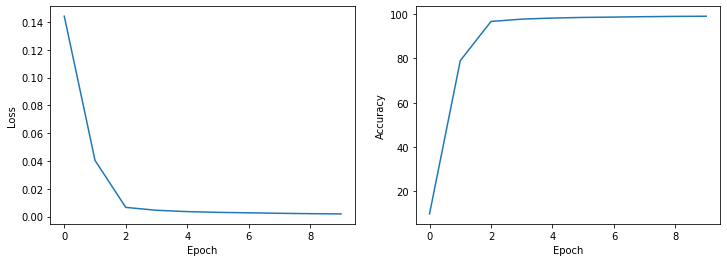

In [32]:
import problem3.training

problem3.training = reload(problem3.training)
# Create fresh models before every run to make sure we start from scratch
image_embed_net = problem3.models.ImageEmbedNet().cuda()
classify_net = problem3.models.ClassifyNet(10).cuda()
mnist_classify_model = problem3.models.ImageClassifyModel(image_embed_net, 
                                                          classify_net)

problem3.training.train(train_full_dataset, mnist_classify_model, 16, 10)

You should get training accuracy of at least 0.98. With the model now trained, let's implement a test function and call it to see how well it works on the test set. Finish the marked portions in testing.py and run the following:

In [33]:
import problem3.testing

problem3.testing = reload(problem3.testing)
problem3.testing.test(test_full_dataset, mnist_classify_model, 16)

Testing Accuracy: 98.820


You should get test set accuracy similar to the train set accuracy.
Now, let's try training on the smaller train set, and see how well the model can work on the test set.

Epoch 0 - Training loss: 0.146 , Training Accuracy: 13.167
Epoch 1 - Training loss: 0.146 , Training Accuracy: 13.167
Epoch 2 - Training loss: 0.146 , Training Accuracy: 13.167
Epoch 3 - Training loss: 0.146 , Training Accuracy: 13.167
Epoch 4 - Training loss: 0.146 , Training Accuracy: 13.167
Epoch 5 - Training loss: 0.146 , Training Accuracy: 13.167
Epoch 6 - Training loss: 0.145 , Training Accuracy: 13.167
Epoch 7 - Training loss: 0.145 , Training Accuracy: 13.167
Epoch 8 - Training loss: 0.145 , Training Accuracy: 13.167
Epoch 9 - Training loss: 0.145 , Training Accuracy: 13.167


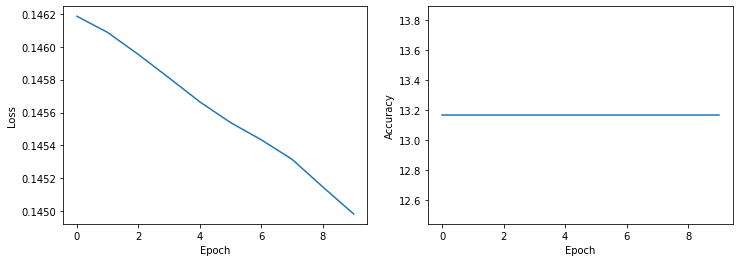

Testing Accuracy: 11.350


In [12]:
image_embed_net = problem3.models.ImageEmbedNet().cuda()
classify_net = problem3.models.ClassifyNet(10).cuda()
mnist_classify_model = problem3.models.ImageClassifyModel(image_embed_net, classify_net)
problem3.training.train(train_small_dataset, mnist_classify_model, 16, 10)
problem3.testing.test(test_full_dataset, mnist_classify_model, 16)

You should get both low training and testing accuracy, since we are not training with much less data. If we iterate over the data for more epochs it is possible to get better results, but still far below the accuracy gotten with the full dataset:

Epoch 0 - Training loss: 0.146 , Training Accuracy: 13.167
Epoch 1 - Training loss: 0.146 , Training Accuracy: 13.167
Epoch 2 - Training loss: 0.145 , Training Accuracy: 13.167
Epoch 3 - Training loss: 0.145 , Training Accuracy: 13.167
Epoch 4 - Training loss: 0.145 , Training Accuracy: 13.167
Epoch 5 - Training loss: 0.145 , Training Accuracy: 13.167
Epoch 6 - Training loss: 0.145 , Training Accuracy: 13.167
Epoch 7 - Training loss: 0.145 , Training Accuracy: 13.167
Epoch 8 - Training loss: 0.144 , Training Accuracy: 13.167
Epoch 9 - Training loss: 0.144 , Training Accuracy: 13.167
Epoch 10 - Training loss: 0.144 , Training Accuracy: 13.167
Epoch 11 - Training loss: 0.143 , Training Accuracy: 13.167
Epoch 12 - Training loss: 0.143 , Training Accuracy: 13.667
Epoch 13 - Training loss: 0.142 , Training Accuracy: 18.000
Epoch 14 - Training loss: 0.141 , Training Accuracy: 27.833
Epoch 15 - Training loss: 0.138 , Training Accuracy: 35.333
Epoch 16 - Training loss: 0.134 , Training Accurac

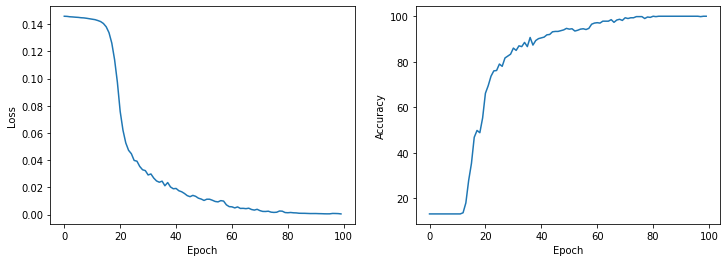

Testing Accuracy: 87.680


In [13]:
image_embed_net = problem3.models.ImageEmbedNet().cuda()
classify_net = problem3.models.ClassifyNet(10).cuda()
mnist_classify_model = problem3.models.ImageClassifyModel(image_embed_net, classify_net)
problem3.training.train(train_small_dataset, mnist_classify_model, 16, 100)
problem3.testing.test(test_full_dataset, mnist_classify_model, 16)

# Representation Learning via Rotation Classification

Now, let's define new datasets for doing our representation learning by predicting the rotation of MNIST digits, and once again call show_batch to get a look at the data:

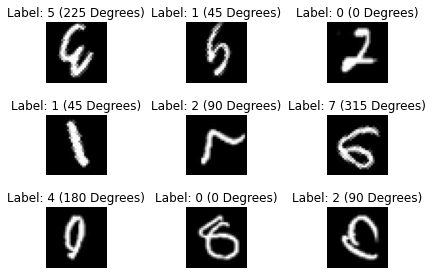

In [14]:
problem3.data = reload(problem3.data) #reload for making changes during debugging

train_rotation_dataset = problem3.data.MNISTDataset('data/MNIST/processed/training.pt', 
                                          pct=1.0, classify_digit_type=False)
test_rotation_dataset = problem3.data.MNISTDataset('data/MNIST/processed/test.pt', 
                                         pct=1.0, classify_digit_type=False)
train_rotation_dataset.show_batch()

Now, let's train a model on the rotation prediction task by once again using our train function:

Epoch 0 - Training loss: 0.130 , Training Accuracy: 12.700
Epoch 1 - Training loss: 0.057 , Training Accuracy: 66.073
Epoch 2 - Training loss: 0.023 , Training Accuracy: 86.698
Epoch 3 - Training loss: 0.011 , Training Accuracy: 94.048
Epoch 4 - Training loss: 0.004 , Training Accuracy: 97.905
Epoch 5 - Training loss: 0.003 , Training Accuracy: 98.353
Epoch 6 - Training loss: 0.003 , Training Accuracy: 98.455
Epoch 7 - Training loss: 0.003 , Training Accuracy: 98.517
Epoch 8 - Training loss: 0.002 , Training Accuracy: 98.598
Epoch 9 - Training loss: 0.002 , Training Accuracy: 98.843


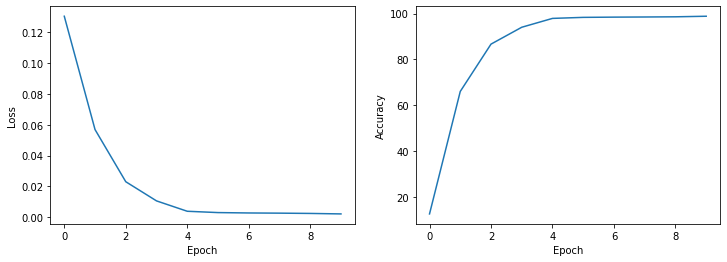

In [15]:
rotation_image_embed_net = problem3.models.ImageEmbedNet().cuda()
rotation_classify_net = problem3.models.ClassifyNet(8).cuda()
mnist_rotation_classify_model = problem3.models.ImageClassifyModel(rotation_image_embed_net, 
                                                   rotation_classify_net)
problem3.training.train(train_rotation_dataset, mnist_rotation_classify_model, 16, 10)

We should once again get testing accuracy similar to training accuracy: (at least 0.95):

In [16]:
problem3.testing.test(test_rotation_dataset, mnist_rotation_classify_model, 16)

Testing Accuracy: 98.060


# Fine-Tuning for MNIST digit classification

Now that we have pretrained our model on the rotation prediction task, let's reuse the image embed part of it to train it for the task of digit classification. We will use load_state_dict to transfer over the weights from the trained model to a new instance of it, so we can later re-use the same representation learning weights in a different setup. Let's first try it on the full dataset and see how fast it converges compared to when we did not pretrain it.

Epoch 0 - Training loss: 0.146 , Training Accuracy: 5.862
Epoch 1 - Training loss: 0.017 , Training Accuracy: 91.342
Epoch 2 - Training loss: 0.005 , Training Accuracy: 97.597
Epoch 3 - Training loss: 0.004 , Training Accuracy: 98.123
Epoch 4 - Training loss: 0.003 , Training Accuracy: 98.448
Epoch 5 - Training loss: 0.003 , Training Accuracy: 98.685
Epoch 6 - Training loss: 0.002 , Training Accuracy: 98.842
Epoch 7 - Training loss: 0.002 , Training Accuracy: 98.952
Epoch 8 - Training loss: 0.002 , Training Accuracy: 99.057
Epoch 9 - Training loss: 0.002 , Training Accuracy: 99.205


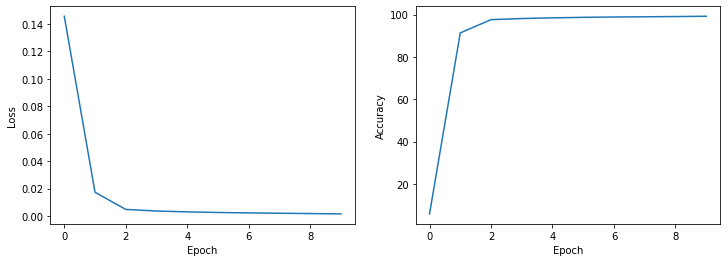

In [17]:
image_embed_net = problem3.models.ImageEmbedNet().cuda()
image_embed_net.load_state_dict(rotation_image_embed_net.state_dict())
classify_net = problem3.models.ClassifyNet(10).cuda()
mnist_classify_model = problem3.models.ImageClassifyModel(image_embed_net, classify_net)
problem3.training.train(train_full_dataset, mnist_classify_model, 16, 10)

In [18]:
problem3.testing.test(test_full_dataset, mnist_classify_model, 16)

Testing Accuracy: 98.840


Now, let's try training with the small dataset again and see how well that works:

Epoch 0 - Training loss: 0.145 , Training Accuracy: 13.833
Epoch 1 - Training loss: 0.140 , Training Accuracy: 26.167
Epoch 2 - Training loss: 0.125 , Training Accuracy: 45.500
Epoch 3 - Training loss: 0.101 , Training Accuracy: 53.167
Epoch 4 - Training loss: 0.070 , Training Accuracy: 71.833
Epoch 5 - Training loss: 0.050 , Training Accuracy: 77.667
Epoch 6 - Training loss: 0.037 , Training Accuracy: 82.833
Epoch 7 - Training loss: 0.030 , Training Accuracy: 86.667
Epoch 8 - Training loss: 0.025 , Training Accuracy: 88.167
Epoch 9 - Training loss: 0.022 , Training Accuracy: 88.667


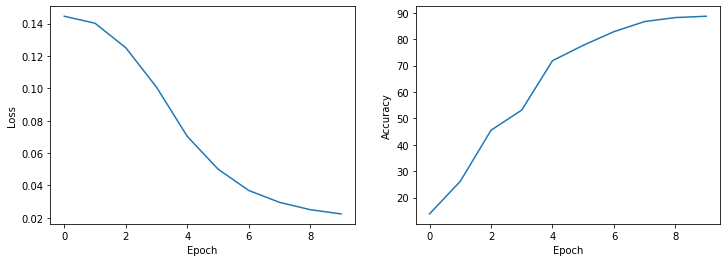

Testing Accuracy: 81.610


In [19]:
image_embed_net = problem3.models.ImageEmbedNet().cuda()
image_embed_net.load_state_dict(rotation_image_embed_net.state_dict())
classify_net = problem3.models.ClassifyNet(10).cuda()
mnist_classify_model = problem3.models.ImageClassifyModel(image_embed_net, classify_net)
problem3.training.train(train_small_dataset, mnist_classify_model, 16, 10)
problem3.testing.test(test_full_dataset, mnist_classify_model, 16)

Like before, we can train on the data for long to get better results, but as you can see above training with just 10 epochs works much better than before with the pretrained features. Still, let's see the results with 50 epochs:

Epoch 0 - Training loss: 0.147 , Training Accuracy: 12.000
Epoch 1 - Training loss: 0.143 , Training Accuracy: 12.000
Epoch 2 - Training loss: 0.130 , Training Accuracy: 30.167
Epoch 3 - Training loss: 0.103 , Training Accuracy: 62.500
Epoch 4 - Training loss: 0.067 , Training Accuracy: 74.167
Epoch 5 - Training loss: 0.043 , Training Accuracy: 81.333
Epoch 6 - Training loss: 0.034 , Training Accuracy: 84.500
Epoch 7 - Training loss: 0.028 , Training Accuracy: 88.000
Epoch 8 - Training loss: 0.022 , Training Accuracy: 90.167
Epoch 9 - Training loss: 0.021 , Training Accuracy: 89.333
Epoch 10 - Training loss: 0.017 , Training Accuracy: 91.500
Epoch 11 - Training loss: 0.015 , Training Accuracy: 93.333
Epoch 12 - Training loss: 0.013 , Training Accuracy: 95.000
Epoch 13 - Training loss: 0.012 , Training Accuracy: 94.333
Epoch 14 - Training loss: 0.010 , Training Accuracy: 96.167
Epoch 15 - Training loss: 0.010 , Training Accuracy: 95.500
Epoch 16 - Training loss: 0.008 , Training Accurac

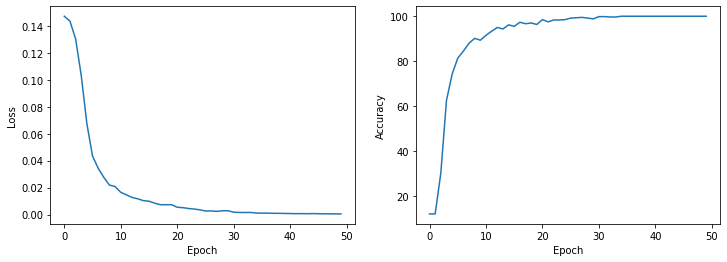

Testing Accuracy: 91.850


In [20]:
image_embed_net = problem3.models.ImageEmbedNet().cuda()
image_embed_net.load_state_dict(rotation_image_embed_net.state_dict())
classify_net = problem3.models.ClassifyNet(10).cuda()
mnist_classify_model = problem3.models.ImageClassifyModel(image_embed_net, classify_net)
problem3.training.train(train_small_dataset, mnist_classify_model, 16, 50)
problem3.testing.test(test_full_dataset, mnist_classify_model, 16)

Not bad! We can also try training without optimizing for the image embedding layers, and just train the classifier part of the network.

Epoch 0 - Training loss: 0.147 , Training Accuracy: 9.000
Epoch 1 - Training loss: 0.144 , Training Accuracy: 10.333
Epoch 2 - Training loss: 0.133 , Training Accuracy: 36.000
Epoch 3 - Training loss: 0.118 , Training Accuracy: 46.667
Epoch 4 - Training loss: 0.098 , Training Accuracy: 55.167
Epoch 5 - Training loss: 0.077 , Training Accuracy: 71.833
Epoch 6 - Training loss: 0.060 , Training Accuracy: 76.667
Epoch 7 - Training loss: 0.047 , Training Accuracy: 82.667
Epoch 8 - Training loss: 0.038 , Training Accuracy: 85.833
Epoch 9 - Training loss: 0.034 , Training Accuracy: 86.000
Epoch 10 - Training loss: 0.029 , Training Accuracy: 88.833
Epoch 11 - Training loss: 0.026 , Training Accuracy: 87.667
Epoch 12 - Training loss: 0.023 , Training Accuracy: 89.333
Epoch 13 - Training loss: 0.021 , Training Accuracy: 90.500
Epoch 14 - Training loss: 0.019 , Training Accuracy: 91.833
Epoch 15 - Training loss: 0.017 , Training Accuracy: 92.000
Epoch 16 - Training loss: 0.015 , Training Accuracy

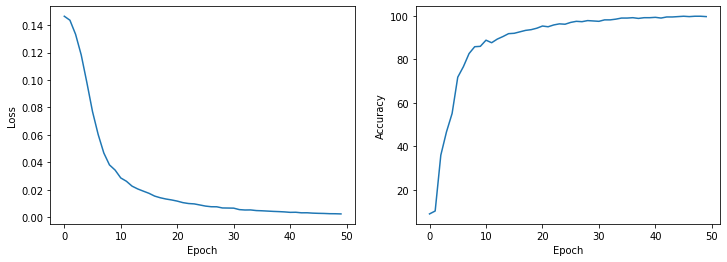

Testing Accuracy: 92.050


In [34]:
image_embed_net = problem3.models.ImageEmbedNet().cuda()
image_embed_net.load_state_dict(rotation_image_embed_net.state_dict())
classify_net = problem3.models.ClassifyNet(10).cuda()
mnist_classify_model = problem3.models.ImageClassifyModel(image_embed_net, classify_net,
                                          exclude_embed_params=True)
problem3.training.train(train_small_dataset, mnist_classify_model, 16, 50)
problem3.testing.test(test_full_dataset, mnist_classify_model, 16)

# Conclusion

That's it! As noted in the PDF, you now just need to download this notebook to submit alongside your python files

Credits: Aspects of this notebook have been adapted from [here](https://colab.research.google.com/github/AmarSaini/Epoching-Blog/blob/master/_notebooks/2020-03-23-Self-Supervision-with-FastAI.ipynb#scrollTo=lsQmOOQsMVFT)